In [1]:

# import torch
import numpy as np
import pandas as pd
import pandas.core.series
import math
import fastf1
import fastf1.core
from typing import List
from datetime import datetime
from pathlib import Path
import pickle
from f1winnerprediction import (
	config,
	utils,
	io_fastf1
)
import logging
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc, mean_absolute_error, r2_score, accuracy_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


fastf1.Cache.enable_cache(config.FASTF1_RAW_CACHE_DIR.as_posix())


In [8]:
sessions_per_grandprix = io_fastf1._extract_nb_gp_from_years(config.YEARS_TO_FETCH)
sessions_per_grandprix

[22, 22, 22, 24, 24]

In [4]:
sessions = {}
for year in tqdm(config.YEARS_TO_FETCH):
	session_dump_name = f"sessions_dump_{year}.pkl"
	session_dump_path = config.FASTF1_CHECKPOINT_DIR / session_dump_name
	session = io_fastf1.load_sessions(session_dump_path)
	sessions.update(session)

100%|██████████| 5/5 [01:08<00:00, 13.67s/it]


In [17]:
io_fastf1._is_sessions_dict_valid(sessions)
for year in sessions:
	print(f"{year}: {len(sessions[year])} sessions loaded.")

2021: 15 sessions loaded.
2022: 10 sessions loaded.
2023: 10 sessions loaded.
2024: 24 sessions loaded.
2025: 24 sessions loaded.


In [3]:
print("fetching sessions")
sessions = io_fastf1.fetch_race_sessions_cache(use_sessions_cache=False)
if not io_fastf1._is_sessions_dict_valid(sessions):
	raise ValueError("Fetched sessions dictionary is not valid.")
print("fetched sessions:")
for year, year_sessions in sessions.items():
	print(f"Year {year}: {len(year_sessions)} sessions")
	
session_dump_path = config.FASTF1_CHECKPOINT_DIR / "sessions_dump.pkl"
try:
	with open(session_dump_path, "wb") as file:
		pickle.dump(sessions, file)
except Exception as e:
	print(f"Error saving sessions to {session_dump_path}: {e}")

DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200))
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200))
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200))


fetching sessions


DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200))
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200))
DEBUG:f1winnerprediction.io_fastf1:Number of GPs/years: [22, 22, 22, 24, 24]
INFO:f1winnerprediction.io_fastf1:Starting fetch from year 2021 grand prix index 1
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200

Hello
+------- FETCHING GP: Bahrain Grand Prix 2021 1/22 -------+


DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/1/results.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:11:46 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1

+------- FETCHING GP: Emilia Romagna Grand Prix 2021 2/22 -------+


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_req

+------- FETCHING GP: Portuguese Grand Prix 2021 3/22 -------+


core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/3/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:12:59 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data 

+------- FETCHING GP: Spanish Grand Prix 2021 4/22 -------+


DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/4/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:13:31 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:

+------- FETCHING GP: Monaco Grand Prix 2021 5/22 -------+


DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/5/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:14:02 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:

+------- FETCHING GP: Azerbaijan Grand Prix 2021 6/22 -------+


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	Fixed incorrect tyre stint information for driver '47'
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read c

+------- FETCHING GP: French Grand Prix 2021 7/22 -------+


DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/7/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:15:03 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:

+------- FETCHING GP: Styrian Grand Prix 2021 8/22 -------+


req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/8/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache 

+------- FETCHING GP: Austrian Grand Prix 2021 9/22 -------+


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_req

+------- FETCHING GP: British Grand Prix 2021 10/22 -------+


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_req

+------- FETCHING GP: Hungarian Grand Prix 2021 11/22 -------+


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_req

+------- FETCHING GP: Belgian Grand Prix 2021 12/22 -------+


req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '33'
core        WARNING 	Fixed incorrect tyre stint information for driver '63'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '99'
core        WARNING 	Fixed incorrect tyre stint information for driver '47'
core        WARNING 	Fixed incorrect tyre stint information for driver '9'
core        WARNING 	Fixed incorrect tyre stint information for driver '7'
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.a

+------- FETCHING GP: Dutch Grand Prix 2021 13/22 -------+


req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/13/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:19:29 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using ca

+------- FETCHING GP: Italian Grand Prix 2021 14/22 -------+


INFO:fastf1.fastf1.core:Processing timing data...
DEBUG:requests_cache.policy.actions:Cache directives from request headers: CacheDirectives()
DEBUG:requests_cache.policy.actions:Pre-read cache checks: Passed
DEBUG:requests_cache.policy.actions:Post-read cache actions: CacheActions(expire_after=datetime.timedelta(seconds=43200), resend_request=True)
DEBUG:requests_cache.session:Stale response; attempting to re-send request
DEBUG:urllib3.connectionpool:https://api.jolpi.ca:443 "GET /ergast/f1/2021/14/laps/1.json HTTP/1.1" 200 None
DEBUG:requests_cache.policy.actions:Cache directives from response headers: CacheDirectives(expires='Thu, 06 Nov 2025 15:19:58 GMT', max_age=3600)
DEBUG:requests_cache.policy.actions:Pre-write cache checks: Passed
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
INFO:f1winnerprediction.io_f

fetched sessions:


In [5]:
io_fastf1._is_sessions_dict_valid(sessions)

True

## Messing around


In [4]:
df = pd.DataFrame({
	 "Position": [1, 2, 5],
	 "B": [4, 5, 6]
})
df[["Position", "B"]].to_dict()

{'Position': {0: 1, 1: 2, 2: 5}, 'B': {0: 4, 1: 5, 2: 6}}

In [37]:
full_df = pd.DataFrame({'Position': range(1, 10)})

# Merge with race results on Position (outer join keeps all drivers)
final_df = pd.merge(full_df, df, on='Position', how='left')
final_df

,Position,B
0,1,4.0
1,2,5.0
2,3,NaN
3,4,NaN
4,5,6.0
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN


In [38]:
session = fastf1.get_session(2021, 'Abu Dhabi', 'R')
df = session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core     

In [ ]:
output: pd.DataFrame = session.results
output

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,1.0,NaT,NaT,NaT,0 days 01:30:17.345000,Finished,26.0,58.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:02.256000,Finished,18.0,58.0
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:05.173000,Finished,15.0,58.0
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,2B4562,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,4.0,4,8.0,NaT,NaT,NaT,0 days 00:00:05.692000,Finished,12.0,58.0
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,5.0,5,12.0,NaT,NaT,NaT,0 days 00:00:06.531000,Finished,10.0,58.0
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:07.463000,Finished,8.0,58.0
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,7.0,7,3.0,NaT,NaT,NaT,0 days 00:00:59.200000,Finished,6.0,58.0
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,8.0,8,11.0,NaT,NaT,NaT,0 days 00:01:01.708000,Finished,4.0,58.0
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,...,9.0,9,9.0,NaT,NaT,NaT,0 days 00:01:04.026000,Finished,2.0,58.0
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,10.0,10,7.0,NaT,NaT,NaT,0 days 00:01:06.057000,Finished,1.0,58.0


In [ ]:
type(output)

fastf1.core.SessionResults

In [ ]:
utils.write_to_file(pd.DataFrame(output))

In [ ]:
output[["Abbreviation","GridPosition", "Position", "ClassifiedPosition"]]

,Abbreviation,GridPosition,Position,ClassifiedPosition
33,VER,1.0,1.0,1
44,HAM,2.0,2.0,2
55,SAI,5.0,3.0,3
22,TSU,8.0,4.0,4
10,GAS,12.0,5.0,5
77,BOT,6.0,6.0,6
4,NOR,3.0,7.0,7
14,ALO,11.0,8.0,8
31,OCO,9.0,9.0,9
16,LEC,7.0,10.0,10


In [ ]:
def create_columns_windows(df:pd.DataFrame, columns: List, window_size=5):
	df = df[columns]
	for col in df:
		# print(df[col])
		assert len(df[col]) >= window_size, f"window size < data length: {window_size} < {len(df[col])}"
		for i in range(len(df[col])):
			print(df[col][i:window_size+i])
			print("+++++++++++++++++++")

In [ ]:
create_columns_windows(output, ["GridPosition"])

33     1.0
44     2.0
55     5.0
22     8.0
10    12.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
44     2.0
55     5.0
22     8.0
10    12.0
77     6.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
55     5.0
22     8.0
10    12.0
77     6.0
4      3.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
22     8.0
10    12.0
77     6.0
4      3.0
14    11.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
10    12.0
77     6.0
4      3.0
14    11.0
31     9.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
77     6.0
4      3.0
14    11.0
31     9.0
16     7.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
4      3.0
14    11.0
31     9.0
16     7.0
5     15.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
14    11.0
31     9.0
16     7.0
5     15.0
3     10.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
31     9.0
16     7.0
5     15.0
3     10.0
18    13.0
Name: GridPosition, dtype: float64
+++++++++++++++++++
16     7.0

In [ ]:
session = fastf1.get_events_remaining(datetime(2021, 1, 1))
session.head(2)

req         WARNING 	DEFAULT CACHE ENABLED! (6.65 GB) /home/dhiabenhamouda/.cache/fastf1


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12 10:00:00+03:00,2021-03-12 07:00:00,...,Practice 3,2021-03-14 10:00:00+03:00,2021-03-14 07:00:00,None,NaT,NaT,None,NaT,NaT,False
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26 14:30:00+03:00,2021-03-26 11:30:00,...,Practice 3,2021-03-27 15:00:00+03:00,2021-03-27 12:00:00,Qualifying,2021-03-27 18:00:00+03:00,2021-03-27 15:00:00,Race,2021-03-28 18:00:00+03:00,2021-03-28 15:00:00,True


In [ ]:
session.tail(2)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
21,21,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2021,2021-12-05,Saudi Arabian Grand Prix,conventional,Practice 1,2021-12-03 16:30:00+03:00,2021-12-03 13:30:00,...,Practice 3,2021-12-04 17:00:00+03:00,2021-12-04 14:00:00,Qualifying,2021-12-04 20:00:00+03:00,2021-12-04 17:00:00,Race,2021-12-05 20:30:00+03:00,2021-12-05 17:30:00,True
22,22,Abu Dhabi,Yas Island,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,2021-12-12,Abu Dhabi Grand Prix,conventional,Practice 1,2021-12-10 13:30:00+04:00,2021-12-10 09:30:00,...,Practice 3,2021-12-11 14:00:00+04:00,2021-12-11 10:00:00,Qualifying,2021-12-11 17:00:00+04:00,2021-12-11 13:00:00,Race,2021-12-12 17:00:00+04:00,2021-12-12 13:00:00,True


## Fetching Race history from previous years


### Init sessions object and dump file / path


In [2]:
# GP sessions
sessions: dict[int, list[fastf1.core.Session]] = {}
Path.mkdir(config.FASTF1_CHECKPOINT_DIR, exist_ok=True)

In [3]:
sessions_dump_path = config.FASTF1_CHECKPOINT_DIR / "sessions_dump.pkl"

In [4]:
# TODO: Create a is_dump_present function
try:
	sessions_dump_path.touch(exist_ok=False)
	is_dump_present = False
except FileExistsError:
	is_dump_present = True

is_dump_present

True

In [5]:
# def save_checkpoint(checkpoint: dict = sessions, path: Path = sessions_dump_path):
# 	with open(path, "wb") as file:
# 	  pickle.dump(checkpoint, file)
	  
# def load_checkpoint(path: Path = sessions_dump_path) -> dict:
# 	checkpoint = {}
# 	with open(path, "rb") as file:
# 	 try:
# 		 checkpoint = pickle.load(file)
# 	 except EOFError as e:
# 		 logging.error(f"Empty dumpfile: {e}")
# 	 except Exception as e:
# 		 logging.error(f"Error loading checkpoint: {e}")

# 	 return checkpoint


### Loading checkpoint

#### Fetching number of GP for given years

In [6]:
# YEARS : List = [2021, 2022, 2023, 2024, 2025]
# # YEARS : List = [2021]
# NUMBER_OF_GP = [fastf1.get_events_remaining(datetime(year, 1, 1))["RoundNumber"].max().item() for year in YEARS]
# NUMBER_OF_GP

In [7]:
# # Verify that the dump is complete
# if is_dump_present:
# 	load_checkpoint(sessions_dump_path)
# 	#Make sure all years and gp are present
# 	# assert sessions.keys() == YEARS, "Missing years in the dump"
# 	if sessions.keys() == YEARS:
# 		logging.warning("Missing years in the dump")
# 	# assert all(len(sessions[year]) == NUMBER_OF_GP[i] for i, year in enumerate(YEARS)), "Missing GPs in the dump"
# 	if sessions.keys() != YEARS or not all(len(sessions[year]) == NUMBER_OF_GP[i] for i, year in enumerate(YEARS)):
# 		logging.warning("Missing GPs in the dump")

# sessions

### Constructing sessions object from F1 cached data

In [8]:
# checkpoint = {
# 	"year": 2021,
# 	"gp_index_start": 1
# }

In [6]:
# # Load All needed Data
# sessions = {}
# years = YEARS
# number_of_gp = NUMBER_OF_GP
# gp_index_start = 1

# global_gp_index = 1
# global_year = 2021
# # Loading checkpoint
# if checkpoint["year"] is not None:
# 	progression_index = YEARS.index(checkpoint["year"])
# 	years = YEARS[progression_index:]
# 	number_of_gp = NUMBER_OF_GP[progression_index:]
# if checkpoint["gp_index_start"] is not None:
# 	gp_index_start = checkpoint["gp_index_start"]
	
# # Loading data and updating checkpoint at each iteration
# try:
# 	count = 0
# 	for year, nb_gp in zip(years, number_of_gp):
# 		global_year = year
# 		sessions[year] = []
# 		for gp_index in range(gp_index_start, nb_gp+1):
# 			global_gp_index = gp_index
# 			try:
# 				session = fastf1.get_session(year, gp_index, 'R')
# 			except Exception as e:
# 				logging.error(f"ERROR FETCHING SESSION: {year} {gp_index} - {e}")
# 				continue
# 			gp_name = session.event.EventName
# 			print(f"+------- FETCHING GP: {gp_name} {year} {gp_index}/{nb_gp} -------+")
# 			try:
# 				session.load()
# 			except Exception as e:
# 				logging.error(f"ERROR LOADING SESSION: {year} {gp_index} - {e}")
# 				continue
# 			sessions[year].append(session)
# 			count += 1
	
# 			if count % 5 == 0:
# 				logging.info("Saving checkpoint..")
# 				save_checkpoint(sessions, sessions_dump_path)
# 				checkpoint["year"] = year
# 				checkpoint["gp_index_start"] = gp_index
# 				count = 0
# except KeyboardInterrupt as e:
#    logging.info("Fetching interrupted by user, saving checkpoint..")
#    save_checkpoint(sessions, sessions_dump_path)
#    checkpoint = {
#        "year": global_year,
#        "gp_index_start": global_gp_index
#    }
# # Final save
# logging.info("Fetching complete, saving checkpoint..")
# save_checkpoint(sessions, sessions_dump_path)

sessions = io_fastf1.fetch_race_sessions_cache([2021], use_checkpoint=False)

INFO:f1winnerprediction.io_fastf1:Starting fetch from year 2021 grand prix index 1
INFO:f1winnerprediction.io_fastf1:Fetching complete, saving checkpoint..


Hello


In [10]:
# checkpoint

### Save sessions dump


In [11]:
io_fastf1.save_checkpoint(sessions, sessions_dump_path)

TypeError: Object of type Session is not JSON serializable

In [ ]:
sessions

{2021: [2021 Season Round 1: Bahrain Grand Prix - Race,
  2021 Season Round 2: Emilia Romagna Grand Prix - Race,
  2021 Season Round 3: Portuguese Grand Prix - Race,
  2021 Season Round 4: Spanish Grand Prix - Race,
  2021 Season Round 5: Monaco Grand Prix - Race,
  2021 Season Round 6: Azerbaijan Grand Prix - Race,
  2021 Season Round 7: French Grand Prix - Race,
  2021 Season Round 8: Styrian Grand Prix - Race,
  2021 Season Round 9: Austrian Grand Prix - Race,
  2021 Season Round 10: British Grand Prix - Race]}

## Data Loading

### Load sessions dump

In [17]:
sessions = io_fastf1.load_sessions()


In [7]:
sessions.keys()

dict_keys([2021])

In [ ]:
sessions[2021][3].results.sort_values(by="Position", ascending=True)

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,HeadshotUrl,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,https://www.formula1.com/content/dam/fom-website/drivers/L/LEWHAM01_Lewis_Hamilton/lewham01.png.transform/1col/image.png,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:33:07.680000,Finished,25.0,66.0
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,https://www.formula1.com/content/dam/fom-website/drivers/M/MAXVER01_Max_Verstappen/maxver01.png.transform/1col/image.png,,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:15.841000,Finished,19.0,66.0
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,https://www.formula1.com/content/dam/fom-website/drivers/V/VALBOT01_Valtteri_Bottas/valbot01.png.transform/1col/image.png,,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:26.610000,Finished,15.0,66.0
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,https://www.formula1.com/content/dam/fom-website/drivers/C/CHALEC01_Charles_Leclerc/chalec01.png.transform/1col/image.png,,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:54.616000,Finished,12.0,66.0
11,11,S PEREZ,PER,perez,Red Bull Racing,0600EF,red_bull,Sergio,Perez,Sergio Perez,https://www.formula1.com/content/dam/fom-website/drivers/S/SERPER01_Sergio_Perez/serper01.png.transform/1col/image.png,,5.0,5,8.0,NaT,NaT,NaT,0 days 00:01:03.671000,Finished,10.0,66.0
3,3,D RICCIARDO,RIC,ricciardo,McLaren,FF9800,mclaren,Daniel,Ricciardo,Daniel Ricciardo,https://www.formula1.com/content/dam/fom-website/drivers/D/DANRIC01_Daniel_Ricciardo/danric01.png.transform/1col/image.png,,6.0,6,7.0,NaT,NaT,NaT,0 days 00:01:13.768000,Finished,8.0,66.0
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,https://www.formula1.com/content/dam/fom-website/drivers/C/CARSAI01_Carlos_Sainz/carsai01.png.transform/1col/image.png,,7.0,7,6.0,NaT,NaT,NaT,0 days 00:01:14.670000,Finished,6.0,66.0
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,https://www.formula1.com/content/dam/fom-website/drivers/L/LANNOR01_Lando_Norris/lannor01.png.transform/1col/image.png,,8.0,8,9.0,NaT,NaT,NaT,NaT,+1 Lap,4.0,65.0
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,https://www.formula1.com/content/dam/fom-website/drivers/E/ESTOCO01_Esteban_Ocon/estoco01.png.transform/1col/image.png,,9.0,9,5.0,NaT,NaT,NaT,NaT,+1 Lap,2.0,65.0
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,https://www.formula1.com/content/dam/fom-website/drivers/P/PIEGAS01_Pierre_Gasly/piegas01.png.transform/1col/image.png,,10.0,10,12.0,NaT,NaT,NaT,NaT,+1 Lap,1.0,65.0


### Extracting Drivers list

In [12]:
drivers = set()

for year in sessions.keys():
	count = 0
	for session in sessions[year]:
		count += 1
		sessions_drivers = set(session.results["Abbreviation"])
		drivers.update(sessions_drivers)

sorted(drivers)
drivers, len(drivers)

({'ALO',
  'BOT',
  'GAS',
  'GIO',
  'HAM',
  'LAT',
  'LEC',
  'MAZ',
  'MSC',
  'NOR',
  'OCO',
  'PER',
  'RAI',
  'RIC',
  'RUS',
  'SAI',
  'STR',
  'TSU',
  'VER',
  'VET'},
 20)

In [19]:
drivers_dict = {driver: idx for idx, driver in enumerate(sorted(drivers))}
drivers_dict

{'ALO': 0,
 'BOT': 1,
 'GAS': 2,
 'GIO': 3,
 'HAM': 4,
 'LAT': 5,
 'LEC': 6,
 'MAZ': 7,
 'MSC': 8,
 'NOR': 9,
 'OCO': 10,
 'PER': 11,
 'RAI': 12,
 'RIC': 13,
 'RUS': 14,
 'SAI': 15,
 'STR': 16,
 'TSU': 17,
 'VER': 18,
 'VET': 19}

## Data Transformation

### Aggregate drivers race position for save grand prix sessions

In [18]:
drivers_dict = io_fastf1.build_drivers_dict(sessions)
drivers_dict

{'NOR': {'index': 9},
 'HAM': {'index': 9},
 'RUS': {'index': 9},
 'RIC': {'index': 9},
 'ALO': {'index': 9},
 'SAI': {'index': 9},
 'LEC': {'index': 9},
 'LAT': {'index': 9},
 'PER': {'index': 9},
 'GIO': {'index': 9},
 'GAS': {'index': 9},
 'MSC': {'index': 9},
 'STR': {'index': 9},
 'VET': {'index': 9},
 'BOT': {'index': 9},
 'RAI': {'index': 9},
 'MAZ': {'index': 9},
 'VER': {'index': 9},
 'TSU': {'index': 9},
 'OCO': {'index': 9}}

In [30]:
df_drivers = pd.DataFrame({'Abbreviation': drivers_dict.keys()})
df_raceonly = df_drivers.copy()
df_qualirace = df_drivers.copy()
for year in sessions.keys():
	for session in sessions[year]:
		event_name = session.event.EventName
		event_name_year = event_name + "_" + str(year)
		session_results = session.results[["Abbreviation", "GridPosition", "Position"]].copy()
		session_results.rename(columns={
     "GridPosition": f"{event_name_year}_GridPosition",
     "Position": f"{event_name_year}_Position"}, inplace=True)
		df_raceonly = pd.merge(df_raceonly, session_results[["Abbreviation", f"{event_name_year}_Position"]], on='Abbreviation', how='left')
		df_qualirace = pd.merge(df_qualirace, session_results[["Abbreviation", f"{event_name_year}_GridPosition", f"{event_name_year}_Position"]], on='Abbreviation', how='left')
		session.results.sort_values(by="Abbreviation", ascending=True, inplace=True)

In [32]:
df_raceonly.to_csv(config.FASTF1_DATA_DIR / "interim" / "df_raceonly.csv")

In [33]:
df_qualirace.to_csv(config.FASTF1_DATA_DIR / "interim" / "df_qualirace.csv")

In [31]:
df_qualirace

,Abbreviation,Bahrain Grand Prix_2021_GridPosition,Bahrain Grand Prix_2021_Position,Emilia Romagna Grand Prix_2021_GridPosition,Emilia Romagna Grand Prix_2021_Position,Portuguese Grand Prix_2021_GridPosition,Portuguese Grand Prix_2021_Position,Spanish Grand Prix_2021_GridPosition,Spanish Grand Prix_2021_Position,Monaco Grand Prix_2021_GridPosition,Monaco Grand Prix_2021_Position,Azerbaijan Grand Prix_2021_GridPosition,Azerbaijan Grand Prix_2021_Position,French Grand Prix_2021_GridPosition,French Grand Prix_2021_Position,Styrian Grand Prix_2021_GridPosition,Styrian Grand Prix_2021_Position,Austrian Grand Prix_2021_GridPosition,Austrian Grand Prix_2021_Position,British Grand Prix_2021_GridPosition,British Grand Prix_2021_Position
0,ALO,9.0,19.0,15.0,10.0,13.0,8.0,10.0,17.0,17.0,13.0,8.0,6.0,9.0,8.0,8.0,9.0,14.0,10.0,7.0,7.0
1,BOT,3.0,3.0,8.0,18.0,1.0,3.0,3.0,3.0,3.0,19.0,10.0,12.0,3.0,4.0,5.0,3.0,5.0,2.0,3.0,3.0
2,GAS,5.0,17.0,5.0,7.0,9.0,10.0,12.0,10.0,6.0,6.0,4.0,3.0,6.0,7.0,6.0,20.0,6.0,9.0,11.0,11.0
3,GIO,12.0,12.0,17.0,14.0,12.0,12.0,14.0,15.0,10.0,10.0,20.0,11.0,13.0,15.0,15.0,15.0,15.0,14.0,15.0,13.0
4,HAM,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,7.0,2.0,15.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0
5,LAT,17.0,18.0,14.0,20.0,18.0,18.0,19.0,16.0,18.0,15.0,16.0,16.0,16.0,18.0,16.0,17.0,18.0,16.0,17.0,14.0
6,LEC,4.0,6.0,4.0,4.0,8.0,6.0,4.0,4.0,1.0,20.0,1.0,4.0,7.0,16.0,7.0,7.0,12.0,8.0,4.0,2.0
7,MAZ,19.0,20.0,19.0,17.0,20.0,19.0,20.0,19.0,19.0,17.0,18.0,14.0,18.0,20.0,20.0,18.0,20.0,19.0,19.0,17.0
8,MSC,18.0,16.0,18.0,16.0,19.0,17.0,18.0,18.0,20.0,18.0,17.0,13.0,15.0,19.0,19.0,16.0,19.0,18.0,18.0,18.0
9,NOR,7.0,4.0,7.0,3.0,7.0,5.0,9.0,8.0,5.0,3.0,9.0,5.0,8.0,5.0,3.0,5.0,2.0,3.0,5.0,4.0


### Load interim raceonly and qualirace results

In [2]:
df_raceonly = pd.read_csv(config.FASTF1_DATA_DIR / "interim" / "df_raceonly.csv", index_col=0)

In [3]:
df_qualirace = pd.read_csv(config.FASTF1_DATA_DIR / "interim" / "df_qualirace.csv", index_col=0)

In [4]:
df_raceonly

,Abbreviation,Bahrain Grand Prix_2021_Position,Emilia Romagna Grand Prix_2021_Position,Portuguese Grand Prix_2021_Position,Spanish Grand Prix_2021_Position,Monaco Grand Prix_2021_Position,Azerbaijan Grand Prix_2021_Position,French Grand Prix_2021_Position,Styrian Grand Prix_2021_Position,Austrian Grand Prix_2021_Position,British Grand Prix_2021_Position
0,ALO,19.0,10.0,8.0,17.0,13.0,6.0,8.0,9.0,10.0,7.0
1,BOT,3.0,18.0,3.0,3.0,19.0,12.0,4.0,3.0,2.0,3.0
2,GAS,17.0,7.0,10.0,10.0,6.0,3.0,7.0,20.0,9.0,11.0
3,GIO,12.0,14.0,12.0,15.0,10.0,11.0,15.0,15.0,14.0,13.0
4,HAM,1.0,2.0,1.0,1.0,7.0,15.0,2.0,2.0,4.0,1.0
5,LAT,18.0,20.0,18.0,16.0,15.0,16.0,18.0,17.0,16.0,14.0
6,LEC,6.0,4.0,6.0,4.0,20.0,4.0,16.0,7.0,8.0,2.0
7,MAZ,20.0,17.0,19.0,19.0,17.0,14.0,20.0,18.0,19.0,17.0
8,MSC,16.0,16.0,17.0,18.0,18.0,13.0,19.0,16.0,18.0,18.0
9,NOR,4.0,3.0,5.0,8.0,3.0,5.0,5.0,5.0,3.0,4.0


In [5]:
df_qualirace

,Abbreviation,Bahrain Grand Prix_2021_GridPosition,Bahrain Grand Prix_2021_Position,Emilia Romagna Grand Prix_2021_GridPosition,Emilia Romagna Grand Prix_2021_Position,Portuguese Grand Prix_2021_GridPosition,Portuguese Grand Prix_2021_Position,Spanish Grand Prix_2021_GridPosition,Spanish Grand Prix_2021_Position,Monaco Grand Prix_2021_GridPosition,Monaco Grand Prix_2021_Position,Azerbaijan Grand Prix_2021_GridPosition,Azerbaijan Grand Prix_2021_Position,French Grand Prix_2021_GridPosition,French Grand Prix_2021_Position,Styrian Grand Prix_2021_GridPosition,Styrian Grand Prix_2021_Position,Austrian Grand Prix_2021_GridPosition,Austrian Grand Prix_2021_Position,British Grand Prix_2021_GridPosition,British Grand Prix_2021_Position
0,ALO,9.0,19.0,15.0,10.0,13.0,8.0,10.0,17.0,17.0,13.0,8.0,6.0,9.0,8.0,8.0,9.0,14.0,10.0,7.0,7.0
1,BOT,3.0,3.0,8.0,18.0,1.0,3.0,3.0,3.0,3.0,19.0,10.0,12.0,3.0,4.0,5.0,3.0,5.0,2.0,3.0,3.0
2,GAS,5.0,17.0,5.0,7.0,9.0,10.0,12.0,10.0,6.0,6.0,4.0,3.0,6.0,7.0,6.0,20.0,6.0,9.0,11.0,11.0
3,GIO,12.0,12.0,17.0,14.0,12.0,12.0,14.0,15.0,10.0,10.0,20.0,11.0,13.0,15.0,15.0,15.0,15.0,14.0,15.0,13.0
4,HAM,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,7.0,2.0,15.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0
5,LAT,17.0,18.0,14.0,20.0,18.0,18.0,19.0,16.0,18.0,15.0,16.0,16.0,16.0,18.0,16.0,17.0,18.0,16.0,17.0,14.0
6,LEC,4.0,6.0,4.0,4.0,8.0,6.0,4.0,4.0,1.0,20.0,1.0,4.0,7.0,16.0,7.0,7.0,12.0,8.0,4.0,2.0
7,MAZ,19.0,20.0,19.0,17.0,20.0,19.0,20.0,19.0,19.0,17.0,18.0,14.0,18.0,20.0,20.0,18.0,20.0,19.0,19.0,17.0
8,MSC,18.0,16.0,18.0,16.0,19.0,17.0,18.0,18.0,20.0,18.0,17.0,13.0,15.0,19.0,19.0,16.0,19.0,18.0,18.0,18.0
9,NOR,7.0,4.0,7.0,3.0,7.0,5.0,9.0,8.0,5.0,3.0,9.0,5.0,8.0,5.0,3.0,5.0,2.0,3.0,5.0,4.0


### Create dataset windowns

In [6]:
df_qualirace.values

array([['ALO', 9.0, 19.0, 15.0, 10.0, 13.0, 8.0, 10.0, 17.0, 17.0, 13.0,
        8.0, 6.0, 9.0, 8.0, 8.0, 9.0, 14.0, 10.0, 7.0, 7.0],
       ['BOT', 3.0, 3.0, 8.0, 18.0, 1.0, 3.0, 3.0, 3.0, 3.0, 19.0, 10.0,
        12.0, 3.0, 4.0, 5.0, 3.0, 5.0, 2.0, 3.0, 3.0],
       ['GAS', 5.0, 17.0, 5.0, 7.0, 9.0, 10.0, 12.0, 10.0, 6.0, 6.0, 4.0,
        3.0, 6.0, 7.0, 6.0, 20.0, 6.0, 9.0, 11.0, 11.0],
       ['GIO', 12.0, 12.0, 17.0, 14.0, 12.0, 12.0, 14.0, 15.0, 10.0,
        10.0, 20.0, 11.0, 13.0, 15.0, 15.0, 15.0, 15.0, 14.0, 15.0, 13.0],
       ['HAM', 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 7.0, 7.0, 2.0,
        15.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0],
       ['LAT', 17.0, 18.0, 14.0, 20.0, 18.0, 18.0, 19.0, 16.0, 18.0,
        15.0, 16.0, 16.0, 16.0, 18.0, 16.0, 17.0, 18.0, 16.0, 17.0, 14.0],
       ['LEC', 4.0, 6.0, 4.0, 4.0, 8.0, 6.0, 4.0, 4.0, 1.0, 20.0, 1.0,
        4.0, 7.0, 16.0, 7.0, 7.0, 12.0, 8.0, 4.0, 2.0],
       ['MAZ', 19.0, 20.0, 19.0, 17.0, 20.0, 19.0, 20.0, 19.0, 19.0

In [7]:
def create_columns_windows_race_quali(
    df_qualirace: pd.DataFrame,
    windows_index_start: int = 1,
    windows_size: int = 5,
    stride: int = 1
) -> pd.DataFrame:
    # Only take quali/race feature columns (skip 'Abbreviation')
    feature_cols = df_qualirace.columns[windows_index_start:]
    n_cols = len(feature_cols)
    if n_cols % 2 != 0:
        raise ValueError("Feature columns after windows_index_start must be even (quali,race pairs).")

    out_cols = [name for i in range(windows_size) for name in (f"quali{i}", f"race{i}")]
    df_windows = pd.DataFrame(columns=out_cols)

    # Work in units of pairs (quali,race)
    n_pairs = n_cols // 2
    nb_windows = math.floor((n_pairs - windows_size) / stride) + 1

    for _, row in df_qualirace.iterrows():
        arr = row[feature_cols].to_numpy()
        pairs = arr.reshape(-1, 2)  # shape: (n_pairs, 2) -> [ [quali, race], ... ]
        w = 0
        while w < nb_windows:
            block = pairs[w : w + windows_size]  # shape: (windows_size, 2)
            if np.isnan(block).any():
                # jump past the last NaN inside the window
                last_nan_pair = np.argwhere(np.isnan(block))[:, 0].max()
                w += 1 + last_nan_pair
                continue
            df_windows.loc[len(df_windows)] = block.flatten()
            w += stride

    return df_windows

In [8]:
def create_columns_windows_race_quali(df_qualirace: pd.DataFrame, windows_index_start=1, windows_size=5, stride=1):
	df_windows = pd.DataFrame(columns=[name for i in range(windows_size) for name in (f"quali{i}", f"race{i}")])

	# all_windows = []
	length = df_qualirace.shape[1] - windows_index_start
	nb_windows = math.floor((length//2 - windows_size)/stride) + 1
	qualirace: pandas.core.series.Series
	for _, qualirace in df_qualirace.iterrows():
		window_index = 0
		while window_index < nb_windows:
		# for window_index in range(nb_windows):
			window_name = f"window_{window_index}"
			start_col_index = windows_index_start + window_index * 2 * stride
			end_col_index = start_col_index + windows_size * 2
			qualirace_window = qualirace[start_col_index:end_col_index]
			# exclude windows with NaN values
			if qualirace_window.isnull().any():
				# find last null within the window and set it to the current window_index
				quali_nan_pos = np.where(qualirace_window.isnull().to_numpy())[0]
				last_nan_pos = quali_nan_pos[-1]
				print(f"Skipping window {window_name} due to NaN before position {last_nan_pos}, jumping to window_index {window_index + last_nan_pos}")
				window_index += 1 + last_nan_pos
				continue
			df_windows.loc[len(df_windows)] = qualirace_window.values
			window_index += 1
			# print(window)	
			# print("+++++++++++++++++++")
	return df_windows

In [116]:
a = io_fastf1.create_columns_windows_race_quali(df_qualirace)

In [117]:
a

,quali0,race0,quali1,race1,quali2,race2,quali3,race3,quali4,race4
0,9.0,19.0,15.0,10.0,13.0,8.0,10.0,17.0,17.0,13.0
1,15.0,10.0,13.0,8.0,10.0,17.0,17.0,13.0,8.0,6.0
2,13.0,8.0,10.0,17.0,17.0,13.0,8.0,6.0,9.0,8.0
3,10.0,17.0,17.0,13.0,8.0,6.0,9.0,8.0,8.0,9.0
4,17.0,13.0,8.0,6.0,9.0,8.0,8.0,9.0,14.0,10.0
5,8.0,6.0,9.0,8.0,8.0,9.0,14.0,10.0,7.0,7.0
6,3.0,3.0,8.0,18.0,1.0,3.0,3.0,3.0,3.0,19.0
7,8.0,18.0,1.0,3.0,3.0,3.0,3.0,19.0,10.0,12.0
8,1.0,3.0,3.0,3.0,3.0,19.0,10.0,12.0,3.0,4.0
9,3.0,3.0,3.0,19.0,10.0,12.0,3.0,4.0,5.0,3.0


In [ ]:
def create_columns_windows_raceonly(df:pd.DataFrame, windows_index_start=1, windows_size=5, stride=1):
	df_windows = pd.DataFrame(columns=[f"race{i}" for i in range(windows_size)])
	
	# all_windows = []
	length = df.shape[1] - windows_index_start
	nb_windows = math.floor((length - windows_size)/stride) + 1
	race: pandas.core.series.Series
	for index, race in df.iterrows():
		for window_index in range(nb_windows):
			window_name = f"window_{window_index}"
			start_col_index = windows_index_start + window_index * stride
			end_col_index = start_col_index + windows_size
			window = race[start_col_index:end_col_index]
			# exclude windows with NaN values
			if window.isnull().any():
				continue
			df_windows.loc[len(df_windows)] = window.values  
			# print(window)	
			# print("+++++++++++++++++++")

	return df_windows
start = datetime.now()
df_windows = io_fastf1.create_columns_windows_raceonly(df_raceonly, windows_size=5)
end = datetime.now()
end - start

datetime.timedelta(seconds=3, microseconds=846614)

In [22]:
def create_columns_windows_raceonly(df:pd.DataFrame, windows_index_start=1, windows_size=5, stride=1):
	df_windows = pd.DataFrame(columns=[f"race{i}" for i in range(windows_size)])
	
	# all_windows = []
	length = df.shape[1] - windows_index_start
	nb_windows = math.floor((length - windows_size)/stride) + 1
	race: pandas.core.series.Series
	for _, race in df.iterrows():
		window_index = 0
		while window_index < nb_windows:
		# for window_index in range(nb_windows):
			window_name = f"window_{window_index}"
			start_col_index = windows_index_start + window_index * stride
			end_col_index = start_col_index + windows_size
			window = race[start_col_index:end_col_index]
			# exclude windows with NaN values
			if window.isnull().any():
				# find last null within the window and set it to the current window_index
				nan_pos = np.where(window.isnull().to_numpy())[0]
				last_nan_pos = nan_pos[-1]
				print(f"Skipping window {window_name} due to NaN at position(s) {nan_pos}, jumping to window_index {window_index + last_nan_pos}")
				window_index += 1 + last_nan_pos
				continue
			df_windows.loc[len(df_windows)] = window.values  
			window_index += 1
			# print(window)	
			# print("+++++++++++++++++++")

	return df_windows
start = datetime.now()
df_windows = create_columns_windows_raceonly(df_raceonly, windows_size=10)
end = datetime.now()
end - start

datetime.timedelta(microseconds=48471)

In [23]:
df_windows.shape

(20, 10)

In [24]:
df_windows

,race0,race1,race2,race3,race4,race5,race6,race7,race8,race9
0,19.0,10.0,8.0,17.0,13.0,6.0,8.0,9.0,10.0,7.0
1,3.0,18.0,3.0,3.0,19.0,12.0,4.0,3.0,2.0,3.0
2,17.0,7.0,10.0,10.0,6.0,3.0,7.0,20.0,9.0,11.0
3,12.0,14.0,12.0,15.0,10.0,11.0,15.0,15.0,14.0,13.0
4,1.0,2.0,1.0,1.0,7.0,15.0,2.0,2.0,4.0,1.0
5,18.0,20.0,18.0,16.0,15.0,16.0,18.0,17.0,16.0,14.0
6,6.0,4.0,6.0,4.0,20.0,4.0,16.0,7.0,8.0,2.0
7,20.0,17.0,19.0,19.0,17.0,14.0,20.0,18.0,19.0,17.0
8,16.0,16.0,17.0,18.0,18.0,13.0,19.0,16.0,18.0,18.0
9,4.0,3.0,5.0,8.0,3.0,5.0,5.0,5.0,3.0,4.0


## Data Preparation

### Data and label split

In [103]:
def data_label_split(df_windows: pd.DataFrame):
	X = df_windows.iloc[:, :-1].values
	y = df_windows.iloc[:, -1].values
	return X, y

In [105]:
for col in df_windows:
   df_windows[col] = pd.to_numeric(df_windows[col], errors='coerce')

In [106]:
X, Y = data_label_split(df_windows)

### Normalize Data

In [107]:
X = (X - X.mean()) / X.std()

### Adjust Y to be zero-indexed | from range (1, 21) to range(20)

In [108]:
Y = Y - 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1417, 9), (355, 9), (1417,), (355,))

In [ ]:
num_classes = int(y_train.max())  # usually 20
params = dict(
    objective="multi:softprob",   # softmax probability output
    eval_metric="mlogloss",
    num_class=num_classes,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    n_estimators=500,
    random_state=42,
)

clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)


# Model Training

## Model v1: Simple | previous race history

### XGBResgressor

In [30]:
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,

)

In [ ]:
model.fit(X_train, y_train.astype(int))

NameError: name 'df_windows' is not defined

In [32]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 3.900347442190412
R²: 0.27247156280953533


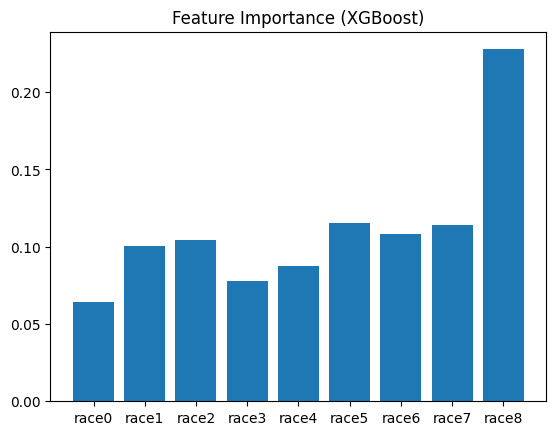

In [34]:
xgb_importance = model.feature_importances_
plt.bar(X.columns, xgb_importance)
plt.title("Feature Importance (XGBoost)")
plt.show()


### XGBClassifier

### XGBResgressor qualirace

In [118]:
def data_label_split_quali_race(df_windows: pd.DataFrame):
	# Drop quali results of race to predict
	df_tmp = df_windows.drop(columns=[df_windows.columns[-2]])
	X = df_tmp.iloc[:, :-1].values
	y = df_tmp.iloc[:, -1].values
	return X, y



for col in a:
	a[col] = pd.to_numeric(a[col], errors='coerce')
X, Y = data_label_split_quali_race(a)

In [119]:
Y

array([13.,  6.,  8.,  9., 10.,  7., 19., 12.,  4.,  3.,  2.,  3.,  6.,
        3.,  7., 20.,  9., 11., 10., 11., 15., 15., 14., 13.,  7., 15.,
        2.,  2.,  4.,  1., 15., 16., 18., 17., 16., 14., 20.,  4., 16.,
        7.,  8.,  2., 17., 14., 20., 18., 19., 17., 18., 13., 19., 16.,
       18., 18.,  3.,  5.,  5.,  5.,  3.,  4.,  9., 20., 14., 14., 20.,
        9.,  4.,  1.,  3.,  4.,  6., 16., 11., 10., 17., 11., 15., 15.,
       12.,  9.,  6., 13.,  7.,  5., 14., 17., 12., 19., 11., 12.,  2.,
        8., 11.,  6.,  5.,  6.,  8., 19., 10.,  8., 13.,  8., 16.,  7.,
       13., 10., 12., 10.,  1., 18.,  1.,  1.,  1., 20.,  5.,  2.,  9.,
       12., 17., 19.])

In [183]:
### Normalize Data
X = (X - X.mean()) / X.std()
Y =  (Y - Y.mean()) / Y.std()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84, 8), (36, 8), (84,), (36,))

In [184]:
y_train

array([ 1.47408695,  0.086711  ,  1.12724296, -1.47408695, -0.26013299,
       -1.30066495, -0.086711  ,  0.086711  ,  1.64750894,  0.78039897,
       -0.60697698,  1.30066495, -0.086711  ,  1.47408695, -0.26013299,
       -0.43355498,  1.47408695, -1.30066495,  0.086711  ,  1.47408695,
        0.60697698,  0.78039897, -0.086711  , -0.43355498, -1.64750894,
        1.12724296,  0.95382097, -0.78039897, -0.95382097,  0.26013299,
       -0.086711  ,  1.30066495, -0.78039897, -1.12724296,  0.26013299,
        0.78039897, -0.26013299,  0.60697698, -0.60697698,  0.086711  ,
        0.43355498, -0.26013299, -0.26013299,  1.30066495,  0.43355498,
        1.30066495,  0.95382097,  0.43355498, -1.64750894,  1.12724296,
       -1.12724296, -0.95382097, -0.78039897, -0.086711  ,  1.64750894,
        0.60697698,  1.64750894,  0.78039897,  0.78039897, -0.95382097,
        0.26013299,  0.26013299, -1.64750894, -0.78039897, -1.47408695,
       -1.12724296,  0.60697698, -0.60697698, -1.47408695, -0.43

In [185]:
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,

)

In [186]:
model.fit(X_train, y_train.astype(int))

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [187]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.9104647157134137
R²: 0.05324497180759091


In [188]:
a.columns

Index(['quali0', 'race0', 'quali1', 'race1', 'quali2', 'race2', 'quali3',
       'race3', 'quali4', 'race4'],
      dtype='object')

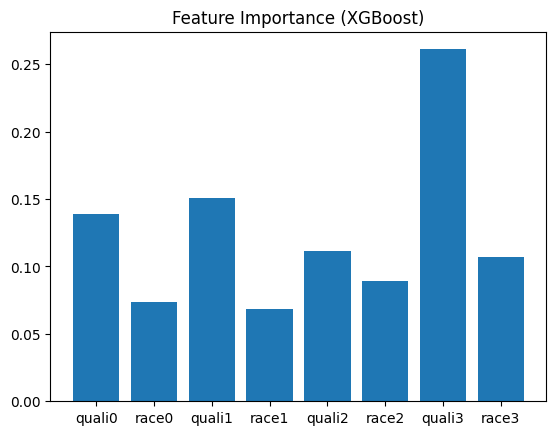

In [189]:
xgb_importance = model.feature_importances_
plt.bar(a.columns[:-2], xgb_importance)
plt.title("Feature Importance (XGBoost)")
plt.show()


### XGBClassifier qualirace

In [75]:
def data_label_split_quali_race(df_windows: pd.DataFrame):
	# Drop quali results of race to predict
	df_tmp = df_windows.drop(columns=[df_windows.columns[-2]])
	X = df_tmp.iloc[:, :-1].values
	y = df_tmp.iloc[:, -1].values
	return X, y



# for col in a:
# 	a[col] = pd.to_numeric(a[col], errors='coerce')
X, Y = data_label_split_quali_race(a)

In [76]:
### Normalize Data
X = (X - X.mean()) / X.std()
Y = Y - 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 8), (24, 8), (96,), (24,))

In [77]:
num_classes = 20
params = dict(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=num_classes,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    n_estimators=500,
)

clf = XGBClassifier(**params)
clf.fit(X_train, y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [78]:
y_test, y_pred

(array([2.0, 18.0, 19.0, 4.0, 9.0, 10.0, 12.0, 18.0, 13.0, 19.0, 14.0,
        15.0, 6.0, 13.0, 2.0, 0.0, 16.0, 11.0, 9.0, 4.0, 16.0, 8.0, 3.0,
        14.0], dtype=object),
 array([13,  1, 12, 18, 16, 15, 18,  0,  5,  5, 19, 15,  5,  8, 14,  8,  9,
        15,  9, 13,  0,  2, 16,  0]))

In [80]:
y_pred

array([19, 10, 17,  5, 17,  6,  4,  1, 15, 13,  7,  3,  5, 10,  4, 17,  5,
        5,  6,  7, 15,  9,  8, 17])

In [81]:
y_test.astype(int)

array([ 2, 18, 19,  4,  9, 10, 12, 18, 13, 19, 14, 15,  6, 13,  2,  0, 16,
       11,  9,  4, 16,  8,  3, 14])

In [93]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test.astype(int), y_pred))
print("F1 Score:", f1_score(y_test.astype(int), y_pred, average='weighted'))

/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(

Accuracy: 0.0
F1 Score: 0.0


In [70]:
# Predicted class probabilities shape = (num_samples, num_classes)
probs = clf.predict_proba(X_test)
preds: np.ndarray = np.argmax(probs, axis=1)   # +1 because positions start at 1

In [71]:
sorted(y_test)

[1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 4.0,
 7.0,
 7.0,
 7.0,
 7.0,
 10.0,
 12.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 14.0,
 14.0,
 14.0,
 15.0,
 18.0,
 19.0]

In [51]:
set(n.item() for n in sorted(list(preds)))


{0, 1, 3, 4, 5, 6, 7, 9, 12, 14, 15, 16, 17, 19}

/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


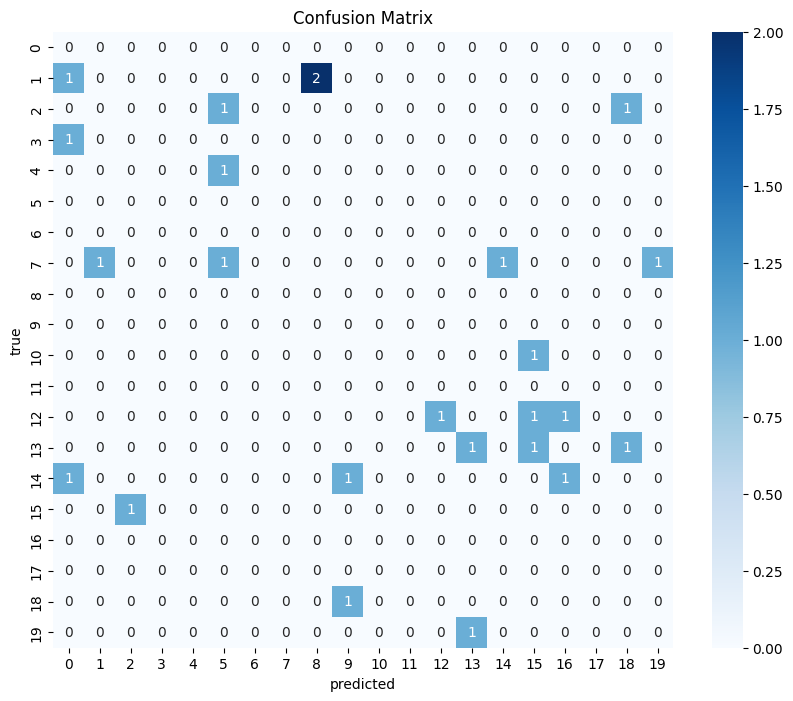

In [73]:
cm = confusion_matrix(y_test.astype(int), preds, labels=range(num_classes))


# cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()

/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:528: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y)
/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/media/dhiabenhamouda/Dhia/Work/F1WinnerPrediction/.venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined

Macro AUC: nan


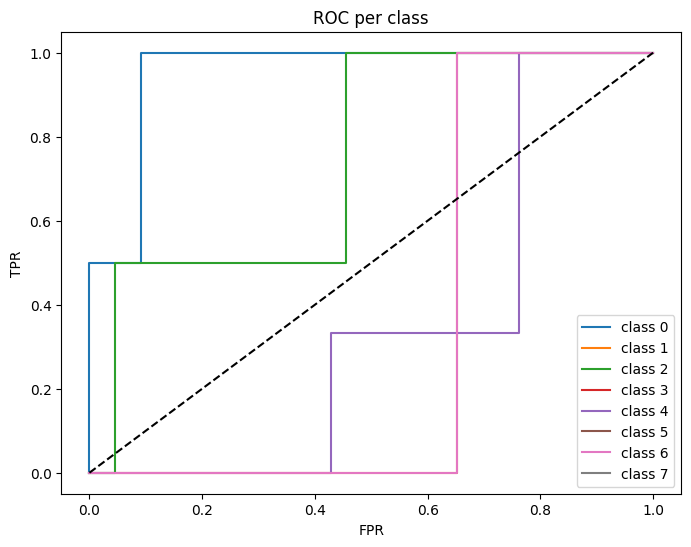

In [38]:
# ROC AUC (multiclass one-vs-rest) & ROC curves
y_bin = label_binarize(y_test, classes=np.arange(num_classes))
# probs shape = (n_samples, num_classes)
print("Macro AUC:", roc_auc_score(y_bin, probs, average='macro', multi_class='ovr'))
# plot few per-class ROC
plt.figure(figsize=(8,6))
for i in range(min(8, num_classes)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f'class {i}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC per class')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score
acc = accuracy_score(y_test, preds)
top3 = top_k_accuracy_score(y_test, probs, k=3, labels=np.arange(num_classes))
print(f"Top-1 acc = {acc:.3f}, Top-3 acc = {top3:.3f}")

Top-1 acc = 0.110, Top-3 acc = 0.279


In [59]:
num_classes = 20
params = dict(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=num_classes,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    n_estimators=500,
)

clf = XGBClassifier(**params)
clf.fit(X_train, y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [61]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.10985915492957747
F1 Score: 0.10689286541714238


array([ 7,  1,  3, 14,  9, 12,  6,  0, 16, 16,  2, 10,  2, 10,  9,  0, 10,
        3, 13, 12, 10,  3,  8,  7,  0, 19,  0, 18,  2,  1,  6,  8,  9,  5,
        1,  8,  6, 13, 15,  5,  5, 18, 17, 16,  6, 19, 17,  2,  7,  1,  3,
       18,  1,  5,  3, 10,  2, 14,  2,  8,  9,  2, 19, 18,  6,  6, 10,  7,
       13, 14,  5, 11,  1, 15,  2, 15, 18,  8, 15,  1, 17,  0,  3,  4,  5,
        2, 18, 15,  4, 12,  3, 17, 15,  4,  0,  4,  7,  2, 12, 10,  5,  6,
        0, 16, 12, 13,  4, 11,  3, 19,  0, 14,  5,  4, 19, 12,  4,  3, 11,
        9, 18,  8,  7,  8,  0,  4,  5, 13,  4,  8, 16, 13,  6, 17, 11, 16,
        3, 12, 11, 17, 11,  9, 18,  1, 13, 19, 15,  3, 18,  6, 18, 14,  2,
       10, 16, 18, 13,  4,  9, 11, 16,  6,  8,  7, 18, 14,  6,  5, 11, 15,
        3, 12, 17,  0,  0, 18, 13,  1, 13, 11,  8, 13,  3,  3, 15,  6,  6,
       10,  7, 10, 18, 14,  1,  8, 13,  4,  6,  4, 15,  4, 12,  8, 13,  9,
       13, 18,  8,  4, 19, 14, 16, 18,  5,  1, 18,  7, 12, 11, 10,  0,  9,
       10, 16,  6,  6, 19

In [ ]:
# Predicted class probabilities shape = (num_samples, num_classes)
probs = clf.predict_proba(X_test)
preds: np.ndarray = np.argmax(probs, axis=1)   # +1 because positions start at 1

In [97]:
y_test.value_counts().sort_index()

race9
0.0     16
1.0     26
2.0     14
3.0     18
4.0     20
5.0     24
6.0     23
7.0     16
8.0     20
9.0     11
10.0    14
11.0    19
12.0    13
13.0    14
14.0    16
15.0    27
16.0    18
17.0    20
18.0    12
19.0    14
Name: count, dtype: int64

In [ ]:
set(n.item() for n in sorted(list(preds)))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

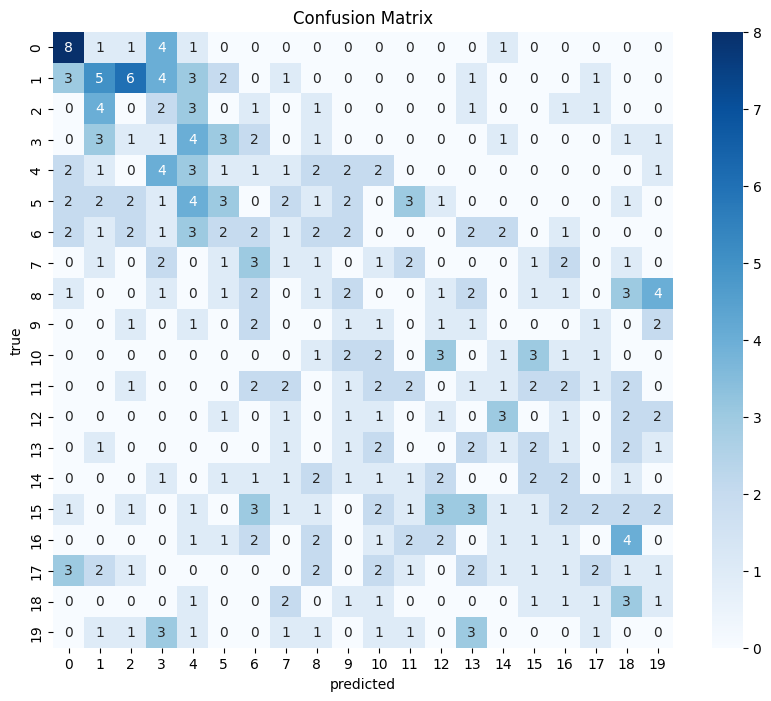

In [99]:
cm = confusion_matrix(y_test, preds, labels=range(num_classes))


cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()

Macro AUC: 0.6595079721493784


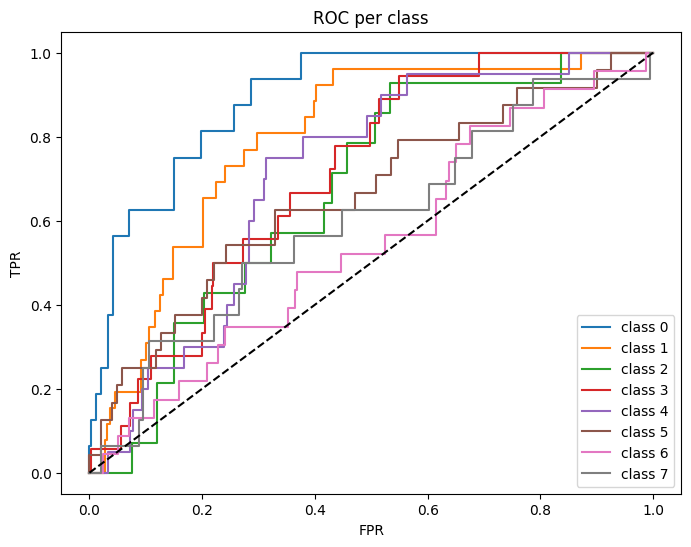

In [100]:
# ROC AUC (multiclass one-vs-rest) & ROC curves
y_bin = label_binarize(y_test, classes=np.arange(num_classes))
# probs shape = (n_samples, num_classes)
print("Macro AUC:", roc_auc_score(y_bin, probs, average='macro', multi_class='ovr'))
# plot few per-class ROC
plt.figure(figsize=(8,6))
for i in range(min(8, num_classes)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f'class {i}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC per class')
plt.show()

In [101]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score
acc = accuracy_score(y_test, preds)
top3 = top_k_accuracy_score(y_test, probs, k=3, labels=np.arange(num_classes))
print(f"Top-1 acc = {acc:.3f}, Top-3 acc = {top3:.3f}")

Top-1 acc = 0.110, Top-3 acc = 0.279


## Model v2: More in depth | Adding Quali results